# Machine learning en textos de reseñas

El conjunto de datos empleado en este notebook corresponde a diversas opiniones de usuarios en los siguientes productos: automóviles, hoteles, lavadoras, libros, teléfonos celulares, música, computadoras y películas. Este conjunto se basa en 400 opiniones junto con su categoría y sentimiento. Para el sentimiento tenemos dos categorias: yes y no, que indican las opiniones positivas y negativas, respectívamente. En esta base de datos las opiniones, 200 opiniones positivas y las otras son negativas mientras que cada articulo tiene un total de 50 registros. 

En primer lugar, se preproceso la información de nuestros textos para modificar ciertas características. Este preprocesamiento se basó en quitar los acentos y números de las reseñas, así como eliminar las *Stop words* y los signos de puntuación contenidos del mismo. Además, se utilizó los lemas de las palabras para obtener la raíz de cada palabra en el texto y realizar un mejor análisis posterior. De igual manera, para algunos textos que no tenían un espacio después de un punto o una coma se remplazaron estos signos por el correspondiente espacio, de manera que al eliminar signos de puntuación, el algoritmo no identificará dos palabras como una sola.

## Representación con bolsa de palabras

Después, se empleó la metodología Bag Of Words (BOW) para obtener una representación vectorial de los textos. Para aplicar **BOW** se estableció que todas las letras serían convertidas a minúsculas con el parámetro lowecase=True, así como se definió ngram_range=(1,1) para extraer 1-gram, es decir, se recuperaron las raíces de las palabras utilizadas en las opiniones. Además, se estableció el parámetro binary=False para que nuestros vectores registraran la frecuencia de las raíces y se definió max_features=750.

In [15]:
#Aplicamos Bag of Words

,abrir,absoluto,acabar,acaso,acceso,acción,aceptar,acompañar,actor,actuación,...,yo,york,zona,álbum,él,época,éxito,últimamente,último,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,4,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0
396,0,1,1,0,0,4,0,0,0,0,...,1,0,0,0,7,0,0,0,1,1
397,0,0,0,0,0,0,0,0,1,1,...,1,11,0,0,11,0,3,0,2,0
398,0,0,0,0,0,2,0,1,1,0,...,1,0,0,0,18,0,1,2,1,1


Una vez obtenida la representación vectorial de los textos preprocesados por medio de BOW se utilizó la distancia de coseno para construir una matriz de similaridades de los textos. En la siguiente figura se observa la matriz de disimilaridades de nuestras opiniones, la cual presenta un patrón interesante basado en cuadrados oscuros a lo largo de la matriz, es decir, existen subgrupos de vectores contiguos en los cuales los vectores son un poco similares, en particular se observan 8 cuadrados que representan los grupos de opiniones de un mismo tipo de producto.

<Axes: >

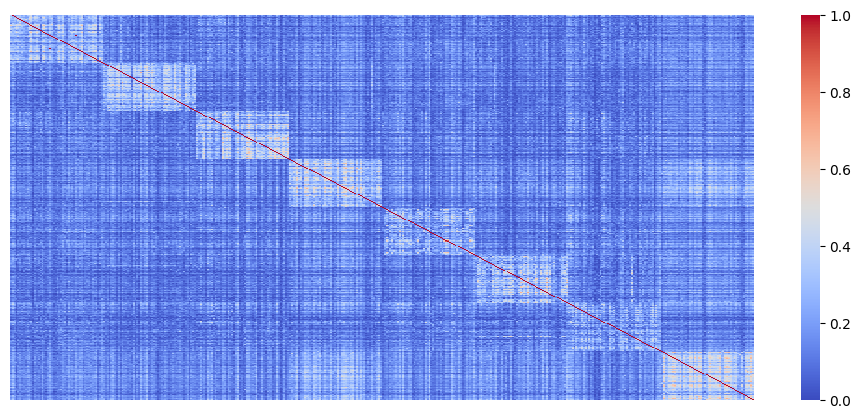

**Visualización de los datos con representación de bolsa de palabras**

La visualización de los datos a través de la representación **bolsa de palabras** para proporcionar una comprensión más profunda de los textos de reseñas de artículos. Este método cuantifica la importancia de cada palabra en un documento en relación con un corpus más amplio, permitiendo destacar términos relevantes y reducir el peso de los comunes. En esta sección, se explorarán diferentes visualizaciones que ilustran las características y patrones de las reseñas, facilitando la identificación de tendencias y temas predominantes.

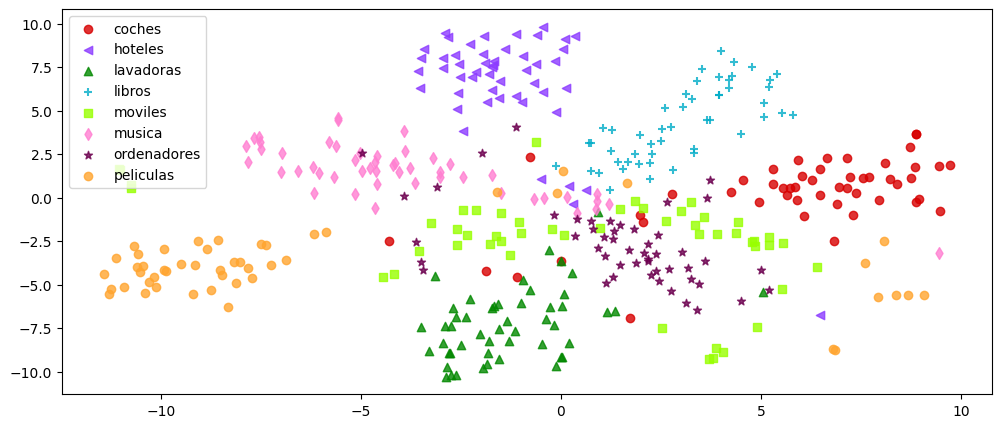

Luego, los datos se dividieron en dos subconjuntos: conjunto de entrenamiento y conjunto de prueba con un tamaño de 80% y 20% respectivamente. Una vez obtenidos estos conjuntos, se ajustó el modelo de regresión logística, así como el modelo LDA y QDA sobre el conjunto de entrenamiento, para posteriormente predecir la categoría de las opiniones en el conjunto de entrenamiento.

### Regresión Logística

En regresión logística, modelamos linealmente el logaritmo de los momios (odds ratio) de las probabilidades posteriores respecto a una probabilidad de referencia:
$$P(y = k|x) = \frac{e^{\beta_{k0}+\beta_k'x}}{1+\sum_{i=1}^{K-1}e^{\beta_{i0}+\beta_i'x}}\;\;i=1,2,\dots,K-1$$
$$P(y = K|x) = \frac{1}{1+\sum_{i=1}^{K-1}e^{\beta_{i0}+\beta_i'x}}\;\;i=1,2,\dots,K-1$$

Para finalizar, ajustamos un modelo de regresión logística con un número máximo de 100 iteraciones, un random_state= 20, la tolerancia se dejó con su parámetro de default y un solver de "lbfgs" porque nuestro problema es de múltiples clases. Además, se estableció a multi_class=‘multinomial’ para emplear la función de pérdida de entropía cruzada.

Text(0, 0.5, 'Clase predecida')

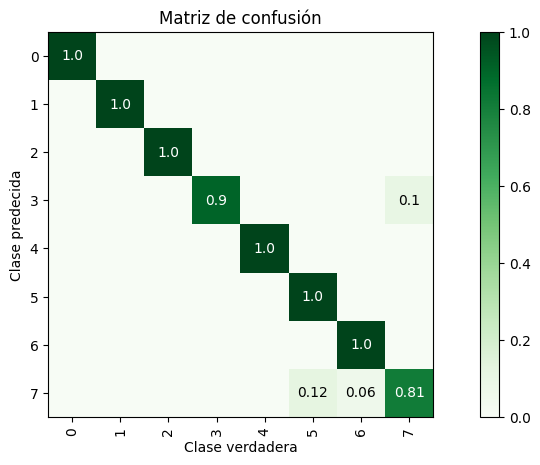

### Análisis de discriminante lineal (LDA)

En este método se considera que nuestros datos provienen de una distribución normal con varianzas iguales:
$$X|y_i \sim N(\mu_i, \Sigma)$$

Las funciones discriminantes, o en general, el clasificador induce fronteras de clasificación lineales. Esas fronteras son aquellas donde las probabilidades posteriores son iguales.

Al aplicar el método LDA se escogió como solver la descomposición de valores propios por el gran número de atributos de cada observación y se definió al parámetro store_covariance como verdadero para calcular la matriz dentro de las clases, mientras que la tolerancia se dejó con su valor por default. Los resultados del método se muestran a continuación:

Text(0, 0.5, 'Clase predecida')

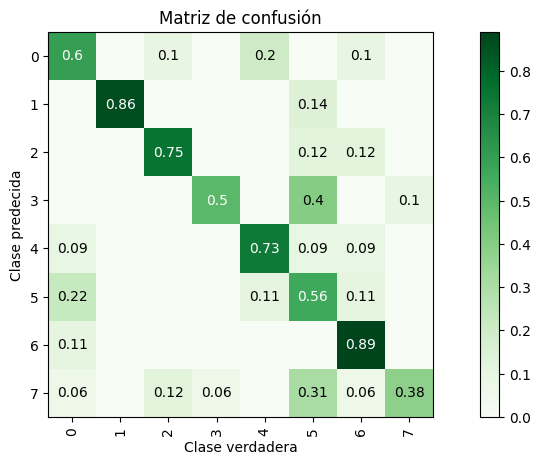

### Análisis de discriminante cuadrático (QDA)

Este es método analoga a LDA, en el  cual se considera que
nuestros datos provienen de una distribución normal pero con varianzas arbitarias:
$$X|y_i \sim N(\mu_i, \Sigma_i)$$

Para el análisis de QDA se definió al parámetro store_covariance como verdadero para calcular la matriz dentro de las clases, mientras que la tolerancia y el parámetro de regularización se usaron con su valor por default. Al aplicar a nuestro conjunto de prueba QDA obtuvimos las siguientes métricas:

Text(0, 0.5, 'Clase predecida')

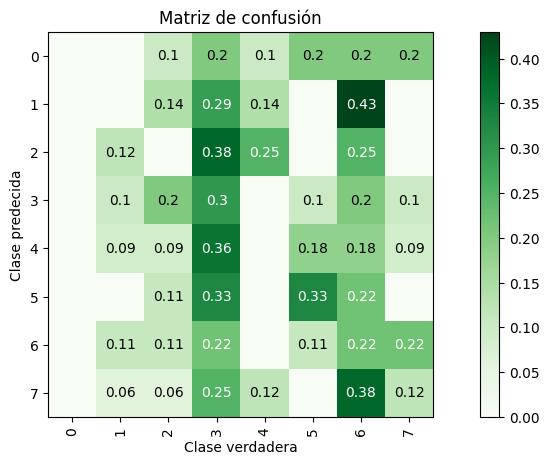

## Representación TF-IDF

En este apartado, se aplicó la representación **TF-IDF (Term Frequency-Inverse Document Frequency)**, un método comúnmente utilizado en el procesamiento de lenguaje natural para convertir texto en una forma numérica que resalta la importancia de las palabras en un conjunto de documentos. Esta técnica pondera las palabras no solo en función de su frecuencia en un documento (TF), sino también considerando su frecuencia en el conjunto total de documentos (IDF), lo que ayuda a identificar términos más relevantes.

Con el fin de limitar la complejidad del modelo y enfocarnos en las palabras más significativas, se estableció un número máximo de **750 tokens**. Esto significa que el vocabulario se restringirá a los 750 términos más importantes, reduciendo dimensionalidad y optimizando el rendimiento del modelo sin sacrificar demasiada información relevante. Esta representación TF-IDF facilitó un análisis más preciso y eficiente de los textos a clasificar o analizar.

In [50]:
#Aplicamos la representación TF - IDF

,abrir,absoluto,acabar,acaso,acceso,acción,aceptar,acompañar,actor,actuación,...,yo,york,zona,álbum,él,época,éxito,últimamente,último,único
0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.072937,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.060239,0.000000,0.087477,0.0,0.133040,0.0,0.000000,0.000000,0.000000,0.000000
2,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.050671,0.0,0.000000,0.000000,0.000000,0.000000
3,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.168874,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.042507,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.00000,0.000000,0.0,0.0,0.073024,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.122504,0.0,0.000000,0.000000,0.047032,0.000000
396,0.0,0.03362,0.023206,0.0,0.0,0.139352,0.0,0.000000,0.000000,0.000000,...,0.021170,0.000000,0.000000,0.0,0.081821,0.0,0.000000,0.000000,0.022438,0.024304
397,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.023652,0.025504,...,0.014893,0.316328,0.000000,0.0,0.090452,0.0,0.066069,0.000000,0.031570,0.000000
398,0.0,0.00000,0.000000,0.0,0.0,0.040996,0.0,0.020248,0.019781,0.000000,...,0.012456,0.000000,0.000000,0.0,0.123792,0.0,0.018419,0.042662,0.013202,0.014300


**Visualización de los datos con representación TF-IDF**

En este apartado, se llevó a cabo una visualización utilizando **t-SNE** (t-distributed Stochastic Neighbor Embedding) para explorar la estructura y distribución de los datos, que han sido representados mediante el método **TF-IDF** (Term Frequency-Inverse Document Frequency). Este enfoque permite transformar los textos de reseñas de artículos en vectores numéricos, capturando la importancia relativa de cada término en relación con el resto del corpus. Al aplicar t-SNE, se espera reducir la dimensionalidad de estos vectores, lo que facilitará la identificación de patrones, similitudes y agrupaciones en las reseñas. Esta visualización no solo proporcionará una representación gráfica de los datos, sino que también permitirá una mejor comprensión de las relaciones entre las diferentes reseñas en el contexto de su contenido textual.

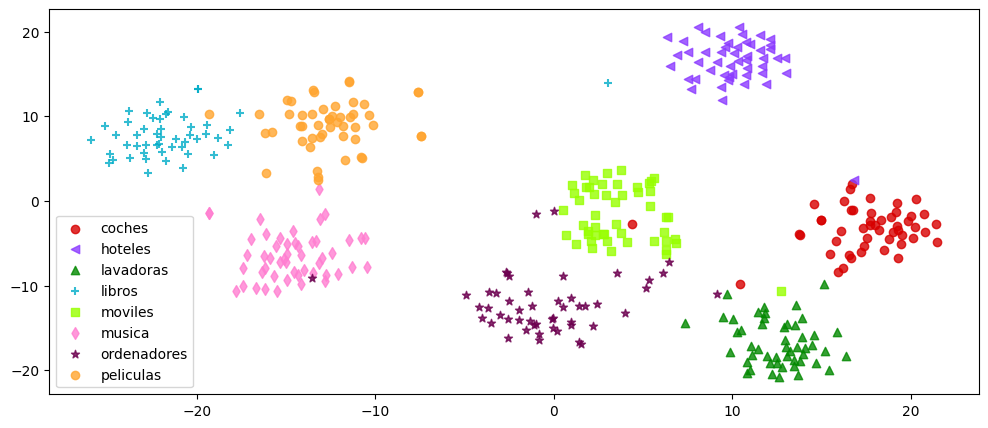

## Métodos de clasificación

Después de crear nuestra representación con TF-IDF, los datos se dividieron en dos subconjuntos: el conjunto de entrenamiento y el conjunto de prueba. Esta división se realizó asignando un tamaño del 80% de los datos al conjunto de entrenamiento y el 20% restante al conjunto de prueba. Esta separación es fundamental, ya que permite entrenar al modelo con una cantidad significativa de datos y, al mismo tiempo, evaluar su desempeño en datos no vistos.

Una vez que se obtuvieron estos conjuntos, se ajustó el modelo de regresión logística, así como los modelos de Análisis Discriminante Lineal (LDA) y Análisis Discriminante Cuadrático (QDA), utilizando el conjunto de entrenamiento. Estos modelos se entrenaron para aprender a clasificar las opiniones en función de las características presentes en los datos. Posteriormente, se utilizaron para predecir la categoría de las opiniones en el conjunto de prueba, lo que permite evaluar la efectividad de cada modelo en la clasificación de nuevos datos.

### Regresión logística

Text(0, 0.5, 'Clase predecida')

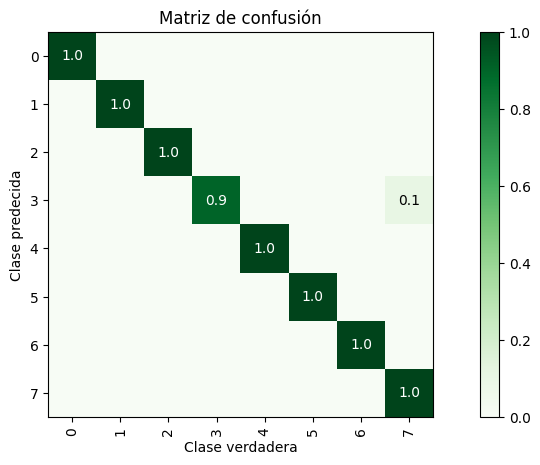

### Análisis de discriminante lineal (LDA)

Text(0, 0.5, 'Clase predecida')

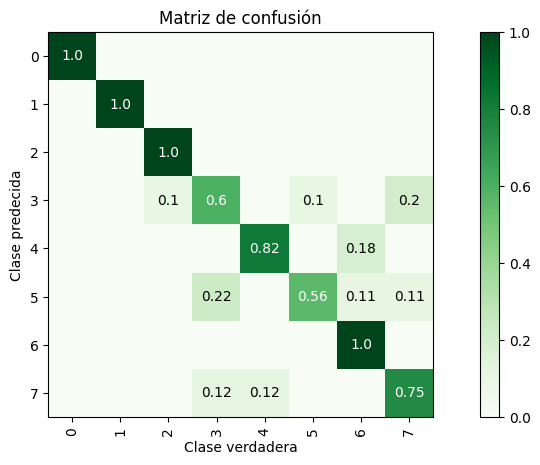

### Análisis de discriminante cuadrático (QDA)

Text(0, 0.5, 'Clase predecida')

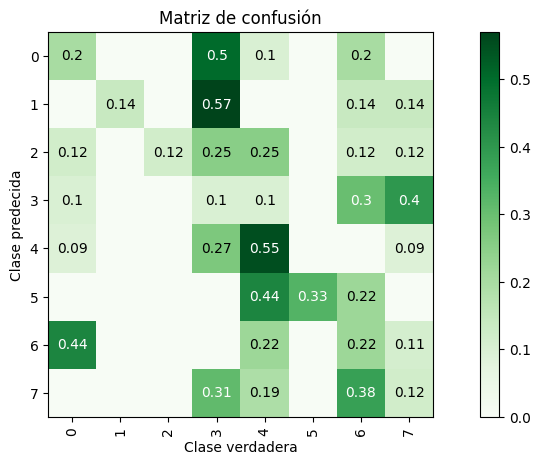